In [32]:
import numpy as np
import matplotlib.pyplot as plt
import datetime, sys, re, os
import pandas as pd

In [33]:
import csky as cy
import astropy
import healpy as hp
import histlite as hl
cy.plotting.mrichman_mpl()
soft_colors = cy.plotting.soft_colors

/mnt/lfs7/user/ssclafani/software/external/csky/csky/plotting.py:92: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  r'\SetSymbolFont{operators}   {sans}{OT1}{cmss} {m}{n}'


In [34]:
import matplotlib as mpl

In [35]:
repo = cy.selections.Repository(local_root='/data/user/ssclafani/data/analyses') #Matches the repo in /data/ana/ but has some additional sensitvities written and loadable
ana_dir = cy.utils.ensure_dir('/data/user/ssclafani/data/analyses')
plot_dir = cy.utils.ensure_dir('/home/ssclafani/public_html/DNNCASACDE/plots/ps_sens')

In [36]:
specs = cy.selections.DNNCascadeDataSpecs.DNNC_10yr
ana = cy.get_analysis (repo, 'version-001-p00', specs)


Setting up Analysis for:
DNNCascade_10yr
Setting up DNNCascade_10yr...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/MC_NuGen_bfrv1_2153x.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86_2011_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86_2012_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86_2013_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86_2014_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86_2015_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86_2016_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86_2017_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86_2018_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86

In [37]:
decs = np.arange(-89, 89.1, 2)

In [38]:
estes_E_minus2 = np.load('/data/user/smancina/PSSearches/ESTES_2019/CSky/ESTES2021_Sens_E-2.npy')
estes_sd = estes_E_minus2[0]
estes_flux = estes_E_minus2[1]
conf= {
'src' : cy.sources(dec=0, ra=0, deg=True),
'flux' : cy.hyp.PowerLawFlux(gamma=2, energy_cutoff=np.inf)
        }
tr = cy.get_trial_runner(ana=ana, conf=conf)
nss = [tr.to_ns(f, E0=1, unit=1e3) for f in estes_flux]
estes_E2dNdE = [tr.to_E2dNdE(n, E0 = 100, unit=1e3) for n in nss]

In [39]:
tracks_E2 = np.load('saved_sens/tracks_10yr_E2.npy')
sd_t = tracks_E2[::2]
tracks_flux_E2 = tracks_E2[1::2]

In [40]:
sd_a = np.load('/data/user/ssclafani/data/analyses/catalogs/antares_13yr_E2_sd.npy')
phi_a = np.load('/data/user/ssclafani/data/analyses/catalogs/antares_13yr_E2_flux.npy')

In [41]:
base_dir = '/data/user/ssclafani/data/analyses/baseline_analysis/'
E2_decs = np.load(base_dir + 'ps/trials/DNNC/ps_sens_decs_E200.npy')
E2_fluxs = np.load(base_dir + 'ps/trials/DNNC/ps_sens_flux_E200.npy')

E3_decs = np.load(base_dir + 'ps/trials/DNNC/ps_sens_decs_E300.npy')
E3_fluxs = np.load(base_dir + 'ps/trials/DNNC/ps_sens_flux_E300.npy')

In [42]:

E2_decs_dp3 = np.load(base_dir + 'ps/trials/DNNC/ps_dp_3.0sigma_decs_E200_chi2fit.npy')
E2_fluxs_dp3 = np.load(base_dir + 'ps/trials/DNNC/ps_dp_3.0sigma_flux_E200_chi2fit.npy')
E2_tss_dp3 = np.load(base_dir + 'ps/trials/DNNC/ps_dp_3.0sigma_tss_E200_chi2fit.npy')

E3_decs_dp3 = np.load(base_dir + 'ps/trials/DNNC/ps_dp_3.0sigma_decs_E300.npy')
E3_fluxs_dp3 = np.load(base_dir + 'ps/trials/DNNC/ps_dp_3.0sigma_flux_E300.npy')


E2_decs_dp5 = np.load(base_dir + 'ps/trials/DNNC/ps_dp_5.0sigma_decs_E200_chi2fit.npy')
E2_fluxs_dp5 = np.load(base_dir + 'ps/trials/DNNC/ps_dp_5.0sigma_flux_E200_chi2fit.npy')

E3_decs_dp5 = np.load(base_dir + 'ps/trials/DNNC/ps_dp_5.0sigma_decs_E300.npy')
E3_fluxs_dp5 = np.load(base_dir + 'ps/trials/DNNC/ps_dp_5.0sigma_flux_E300.npy')


In [43]:

E2_decs_dp3_nofit = np.load(base_dir + 'ps/trials/DNNC/ps_dp_3.0sigma_decs_E200_nofit.npy')
E2_fluxs_dp3_nofit = np.load(base_dir + 'ps/trials/DNNC/ps_dp_3.0sigma_flux_E200_nofit.npy')
E2_tss_dp3_nofit = np.load(base_dir + 'ps/trials/DNNC/ps_dp_3.0sigma_tss_E200_nofit.npy')

E2_decs_dp5_nofit = np.load(base_dir + 'ps/trials/DNNC/ps_dp_5.0sigma_decs_E200_nofit.npy')
E2_fluxs_dp5_nofit = np.load(base_dir + 'ps/trials/DNNC/ps_dp_5.0sigma_flux_E200_nofit.npy')


E3_decs_dp3_nofit = np.load(base_dir + 'ps/trials/DNNC/ps_dp_3.0sigma_decs_E300_nofit.npy')
E3_fluxs_dp3_nofit = np.load(base_dir + 'ps/trials/DNNC/ps_dp_3.0sigma_flux_E300_nofit.npy')
E3_tss_dp3_nofit = np.load(base_dir + 'ps/trials/DNNC/ps_dp_3.0sigma_tss_E300_nofit.npy')

E3_decs_dp5_nofit = np.load(base_dir + 'ps/trials/DNNC/ps_dp_5.0sigma_decs_E300_nofit.npy')
E3_fluxs_dp5_nofit = np.load(base_dir + 'ps/trials/DNNC/ps_dp_5.0sigma_flux_E300_nofit.npy')


In [44]:
base_dir = '/data/user/ssclafani/data/analyses/systematics_full/'
E2_sysdecs = np.load(base_dir + 'ps/trials/DNNC/ps_sens_decs_E200.npy')
E2_sysfluxs = np.load(base_dir + 'ps/trials/DNNC/ps_sens_flux_E200.npy')

E3_sysdecs = np.load(base_dir + 'ps/trials/DNNC/ps_sens_decs_E300.npy')
E3_sysfluxs = np.load(base_dir + 'ps/trials/DNNC/ps_sens_flux_E300.npy')

In [45]:
preliminary = False

In [60]:
E2_replacement_dp3_decs = np.load('/data/user/ssclafani/data/analyses/baseline_replacement/ps_dp_3.0sigma_decs_E200_nofit.npy')
E2_replacement_dp3_fluxs = np.load('/data/user/ssclafani/data/analyses/baseline_replacement/ps_dp_3.0sigma_flux_E200_nofit.npy')
E2_replacement_dp3_tss = np.load('/data/user/ssclafani/data/analyses/baseline_replacement/ps_dp_3.0sigma_tss_E200_nofit.npy')

(0.0, 19.713820908521857)

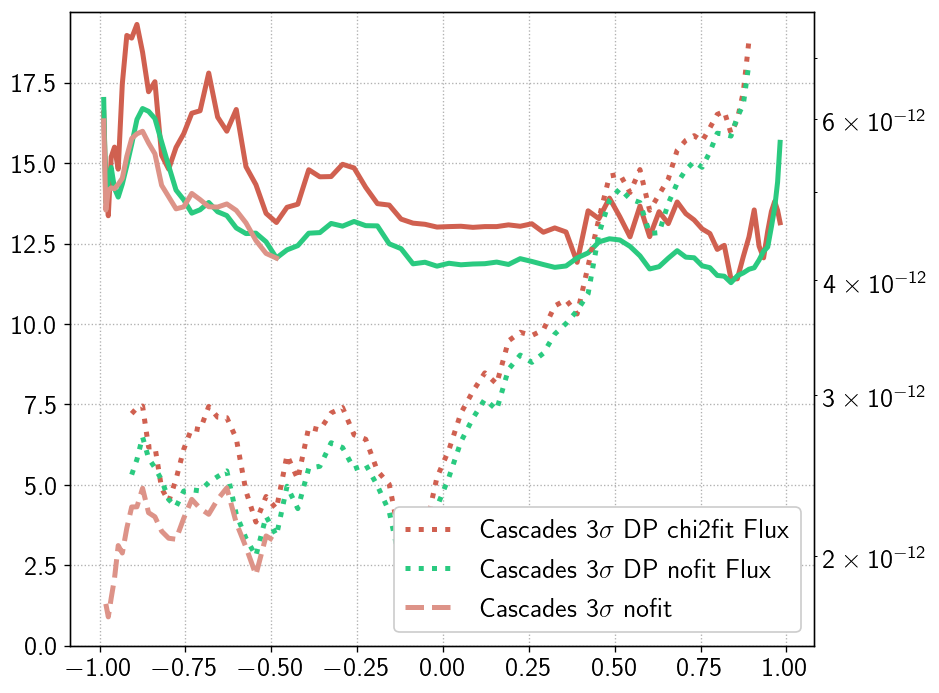

In [62]:
mpl.rc('font', size=16) 
fig, ax1 = plt.subplots (1, figsize=(8,7)) 
sd_m, phi_m = repo.get_performance('sens_E200_MESE')[:2]

ax2 = ax1.twinx()

ax1.plot(sorted(np.sin(np.radians(E2_decs_dp3))), E2_tss_dp3, 
             ls = '-', c=soft_colors[1], lw=3, label='Cascades 3$\sigma$ DP chi2fit')
'''ax1.semilogy(sorted(np.sin(np.radians(E2_decs_dp5))), E2_fluxs_dp5, 
             ls = '--', c=soft_colors[1], lw=3, label='Cascades 5$\sigma$ DP chi2fit')
'''
ax1.plot(sorted(np.sin(np.radians(E2_decs_dp3_nofit))), E2_tss_dp3_nofit,
             ls = '-', c=soft_colors[2], lw=3, label='Cascades 3$\sigma$ DP nofit')

ax1.plot(sorted(np.sin(np.radians(E2_replacement_dp3_decs))), E2_replacement_dp3_tss,
             ls = '-', c=soft_colors[3], lw=3, label='Cascades 3$\sigma$ DP replacement')


ax2.semilogy(sorted(np.sin(np.radians(E2_decs_dp3[8:-8]))), E2_fluxs_dp3[8:-8], 
             ls = ':', c=soft_colors[1], lw=3, label='Cascades 3$\sigma$ DP chi2fit Flux')

ax2.semilogy(sorted(np.sin(np.radians(E2_decs_dp3_nofit[8:-8]))), E2_fluxs_dp3_nofit[8:-8], 
             ls = ':', c=soft_colors[2], lw=3, label='Cascades 3$\sigma$ DP nofit Flux')

ax2.semilogy(sorted(np.sin(np.radians(E2_replacement_dp3_decs[1:]))), E2_replacement_dp3_fluxs[1:], 
             ls = '--', c=soft_colors[3], lw=3, label='Cascades 3$\sigma$ replacement')


ax1.grid()
plt.legend(loc='lower right')
ax1.set_ylim(0)

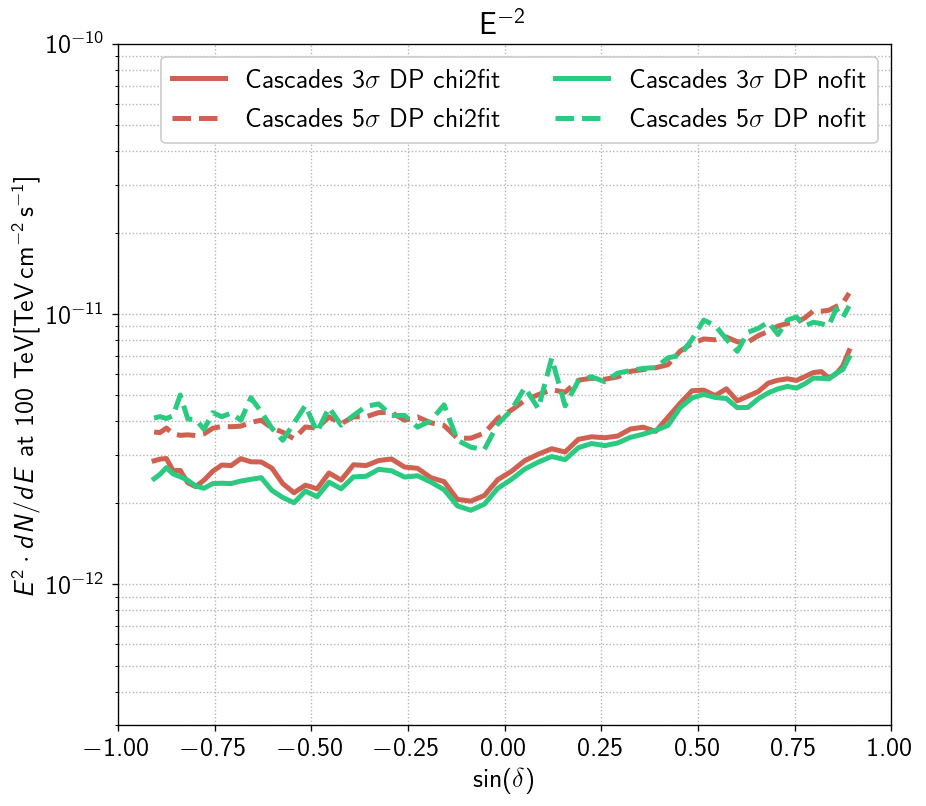

In [47]:
mpl.rc('font', size=16) 
fig, ax1 = plt.subplots (1, figsize=(8,7)) 
sd_m, phi_m = repo.get_performance('sens_E200_MESE')[:2]


ax1.semilogy(sorted(np.sin(np.radians(E2_decs_dp3[8:-8]))), E2_fluxs_dp3[8:-8], 
             ls = '-', c=soft_colors[1], lw=3, label='Cascades 3$\sigma$ DP chi2fit')
ax1.semilogy(sorted(np.sin(np.radians(E2_decs_dp5[8:-8]))), E2_fluxs_dp5[8:-8], 
             ls = '--', c=soft_colors[1], lw=3, label='Cascades 5$\sigma$ DP chi2fit')

ax1.semilogy(sorted(np.sin(np.radians(E2_decs_dp3_nofit[8:-8]))), E2_fluxs_dp3_nofit[8:-8], 
             ls = '-', c=soft_colors[2], lw=3, label='Cascades 3$\sigma$ DP nofit')
ax1.semilogy(sorted(np.sin(np.radians(E2_decs_dp5_nofit[8:-8]))), E2_fluxs_dp5_nofit[8:-8], 
             ls = '--', c=soft_colors[2], lw=3, label='Cascades 5$\sigma$ DP nofit')


ax1.set_xlabel (r'$\sin(\delta)$')
ax1.set_ylabel (
    r'$E^2\cdot dN/dE$'
    r' at 100 TeV'
    r'[$\textsf{TeV}\,\textsf{cm}^{-2}\,\textsf{s}^{-1}]$')
ax1.set_xlim (-1, 1)
ax1.grid(which='both')
ax1.set_ylim (3e-13, 1e-10)
ax1.legend (ncol=2)
ax1.set_title('E$^{-2}$')
if preliminary == True:
    ax1.text(-.9, 1e-13, r'\textbf{IceCube Preliminary}', c='r')
plt.tight_layout()
#cy.plotting.saving(plot_dir, 'ps_sens_E200_no_sources')

Reading /data/user/ssclafani/data/analyses/performance/sens_E200_ps10_current.tuple.npy ...


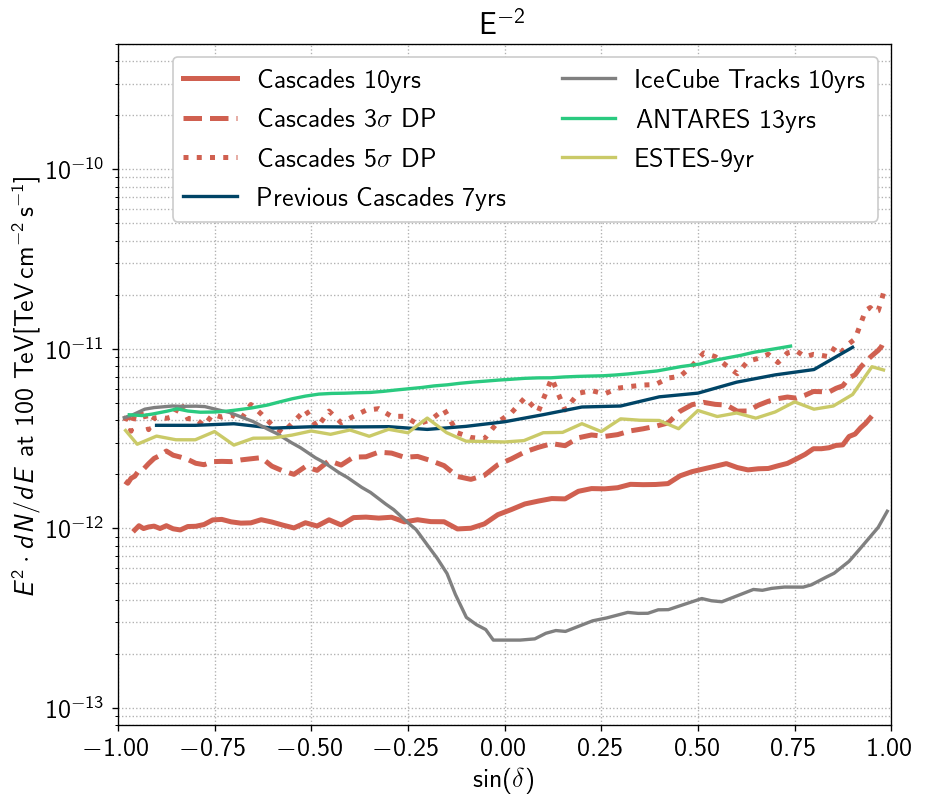

In [48]:
mpl.rc('font', size=16) 
fig, ax1 = plt.subplots (1, figsize=(8,7)) 
sd_m, phi_m = repo.get_performance('sens_E200_MESE')[:2]

ax1.semilogy(sorted(np.sin(np.radians(E2_decs[8:-8]))), E2_fluxs[8:-8], 
             ls = '-', c=soft_colors[1], lw=3, label='Cascades 10yrs')
#ax1.semilogy(sorted(np.sin(np.radians(E2_decs_dp3[8:-8]))), E2_fluxs_dp3[8:-8], 
#             ls = '--', c=soft_colors[1], lw=3, label='Cascades 3$\sigma$ DP')
#ax1.semilogy(sorted(np.sin(np.radians(E2_decs_dp5[8:-8]))), E2_fluxs_dp5[8:-8], 
#             ls = ':', c=soft_colors[1], lw=3, label='Cascades 5$\sigma$ DP')

ax1.semilogy(sorted(np.sin(np.radians(E2_decs_dp3_nofit[1:]))), E2_fluxs_dp3_nofit[1:], 
             ls = '--', c=soft_colors[1], lw=3, label='Cascades 3$\sigma$ DP')
ax1.semilogy(sorted(np.sin(np.radians(E2_decs_dp5_nofit[1:]))), E2_fluxs_dp5_nofit[1:], 
             ls = ':', c=soft_colors[1], lw=3, label='Cascades 5$\sigma$ DP')

ax1.semilogy (sd_m, phi_m,lw=2, c=soft_colors[0],  label=r'Previous Cascades 7yrs')


#ax1.semilogy(sorted(np.sin(np.radians(E2_sysdecs[4:-4]))), E2_sysfluxs[4:-4], 
#             ls = ':', c=soft_colors[1], lw=3, label='Systematics FullRange')
sd, phi = repo.get_performance ('sens_E200_ps10_current')[:2]
ax1.semilogy (sd_t, tracks_flux_E2, label=r'IceCube Tracks 10yrs', color='grey', ls='-')
#antares_sens = pd.read_pickle('/data/user/ssclafani/data/analyses/catalogs/antares_E2.pickle')
#sd_a = antares_sens['sindec']
#phi_a = antares_sens['flux']
ax1.semilogy (sd_a, phi_a /1e3, label=r'ANTARES 13yrs', color=soft_colors[2],lw=2,  ls='-')

ax1.semilogy(estes_sd, estes_E2dNdE, label='ESTES-9yr', color=soft_colors[4], lw=2)

ax1.set_xlabel (r'$\sin(\delta)$')
ax1.set_ylabel (
    r'$E^2\cdot dN/dE$'
    r' at 100 TeV'
    r'[$\textsf{TeV}\,\textsf{cm}^{-2}\,\textsf{s}^{-1}]$')
ax1.set_xlim (-1, 1)
ax1.grid(which='both')
ax1.set_ylim (.8e-13, 5e-10)
ax1.legend (ncol=2)
ax1.set_title('E$^{-2}$')
if preliminary == True:
    ax1.text(-.9, 1e-13, r'\textbf{IceCube Preliminary}', c='r')
plt.tight_layout()
#cy.plotting.saving(plot_dir, 'ps_sens_E200_no_sources')

In [49]:
estes_E_minus3 = np.load('/data/user/smancina/PSSearches/ESTES_2019/CSky/ESTES2021_Sens_E-3.npy')
estes_sd = estes_E_minus3[0]
estes_flux = estes_E_minus3[1]


conf= {
'src' : cy.utils.Sources(dec=0, ra=0, deg=False),
'flux' : cy.hyp.PowerLawFlux(gamma=3, energy_cutoff=np.inf)
        }
tr = (cy.get_trial_runner(ana=ana, conf=conf))
    
nss = [tr.to_ns(f, E0=1, unit=1e3) for f in estes_flux]
estes_E2dNdE = [tr.to_E2dNdE(n, E0 = 100, unit=1e3) for n in nss]

In [50]:
tenyr = [
-0.9931120539614235, 4.009351338457517e-9,
-0.9879156528791565, 4.3655387555201065e-9,
-0.9771328571242698, 5.081033227790688e-9,
-0.9673689635423766, 5.53005543242114e-9,
-0.9599625987814442, 5.7763240896998385e-9,
-0.9490770344453158, 6.5293487574201836e-9,
-0.9379226907428633, 6.987024206204315e-9,
-0.9287841922878419, 7.186620227735704e-9,
-0.9088945191798543, 7.724499376241125e-9,
-0.8970682270615913, 7.94428849448114e-9,
-0.8868546111412734, 8.118582410461678e-9,
-0.8626644681720992, 8.287120970353303e-9,
-0.8508381760538363, 8.331002453730893e-9,
-0.84008700140087, 8.377266662208591e-9,
-0.8153592996990475, 8.32550458635424e-9,
-0.8035330075807846, 8.213594450459303e-9,
-0.7927818329278183, 8.101405692100736e-9,
-0.7691292486912925, 7.791075560806523e-9,
-0.7573029565730296, 7.655964651203297e-9,
-0.7465517819200633, 7.527888764548648e-9,
-0.723974315148834, 7.152700269471398e-9,
-0.7121480230305711, 7.040269347343103e-9,
-0.7008592896449566, 6.956418577230591e-9,
-0.6788193816063757, 6.551476593471229e-9,
-0.6669930894881128, 6.370221435800476e-9,
-0.6562419148351464, 6.225180592020753e-9,
-0.6336644480639172, 5.881174591324164e-9,
-0.6218381559456543, 5.724129554985725e-9,
-0.611086981292688, 5.59851977585496e-9,
-0.5895846319867555, 5.2690079858924785e-9,
-0.5777583398684925, 5.106351449695769e-9,
-0.5670071652155262, 4.954345679551553e-9,
-0.5465799333748903, 4.589960802380283e-9,
-0.5347536412566274, 4.435072066960691e-9,
-0.524002466603661, 4.312370005019539e-9,
-0.5046503522283218, 3.972117772563442e-9,
-0.49282406011005886, 3.81912247834261e-9,
-0.48261044418974086, 3.689027917056181e-9,
-0.4637958885470498, 3.368922093967975e-9,
-0.45196959642878687, 3.2252909701469516e-9,
-0.44175598050846887, 3.1131118237756668e-9,
-0.42401654233107455, 2.807775128028654e-9,
-0.41219025021281164, 2.653686679302192e-9,
-0.4030517517577903, 2.5596278150356867e-9,
-0.38746254851098916, 2.2987557651474e-9,
-0.37563625639272624, 2.162585403109451e-9,
-0.3664977579377049, 2.07483214762821e-9,
-0.3520508669977813, 1.815658373949681e-9,
-0.3426915854918511, 1.7169675225750588e-9,
-0.33693202764204755, 1.636226289278942e-9,
-0.32037521867647945, 1.4349233158687452e-9,
-0.3109028679559187, 1.3314294111529749e-9,
-0.30252826875255545, 1.291160474538419e-9,
-0.2891968121828772, 1.1286182707364587e-9,
-0.2801405285928491, 1.0451828984364289e-9,
-0.2733209109453303, 1.000088284089125e-9,
-0.26144342275729127, 8.716531866908935e-10,
-0.2530728653489105, 8.054142649351652e-10,
-0.24585421951049025, 7.714261466875367e-10,
-0.2345654861248756, 6.688783056576847e-10,
-0.22633827771186787, 6.166744467752426e-10,
-0.2202049885526991, 5.875318756313286e-10,
-0.21006816673704565, 5.069255644487513e-10,
-0.2026250458234533, 4.637610933644587e-10,
-0.19845689811184175, 4.4166388891415925e-10,
-0.18972363623989374, 3.8172577414420636e-10,
-0.18319023010462954, 3.5010674685035993e-10,
-0.178428995615459, 3.3087626667056017e-10,
-0.172048103646101, 2.8403832685476953e-10,
-0.1679593993462607, 2.5956293124842674e-10,
-0.16460605677593088, 2.447867938642031e-10,
-0.1580715765972449, 2.0958129571331333e-10,
-0.15386884468744877, 1.924088886861725e-10,
-0.15120548551205482, 1.80370108016593e-10,
-0.14663623628454414, 1.5562651151101845e-10,
-0.1374977378295228, 1.0536350233810085e-10,
-0.13606424787579408, 9.664473994660266e-11,
-0.12674656317655653, 6.008645380982016e-11,
-0.1248113517390228, 5.416397342753995e-11,
-0.12375159309465888, 5.092344426591505e-11,
-0.12083341711742523, 4.295429276956347e-11,
-0.11975829965212847, 3.9481065834366405e-11,
-0.11868318218683194, 3.686414220358015e-11,
-0.11760806472153518, 3.149738108009e-11,
-0.11514161877173712, 2.788449206627426e-11,
-0.10875902096870904, 2.2778125608125616e-11,
-0.09998808404028492, 2.114329012531132e-11,
-0.09156633056212815, 2.0389387498290853e-11,
-0.07890383597085648, 1.7717218037145577e-11,
-0.07146071505726459, 1.635999055200234e-11,
-0.06661677922460951, 1.5534290899926894e-11,
-0.05856619725232859, 1.3340645047589032e-11,
-0.053638575536385735, 1.2298598865128159e-11,
-0.0482629882099026, 1.1595017934323441e-11,
-0.038049372289584715, 1.0152091782410212e-11,
-0.02622308017132169, 9.97603671217099e-12,
-0.014934346785707264, 9.880348152367565e-12,
0.008180678718170409, 1.0058697870039602e-11,
0.020006970836433213, 1.0128662321666193e-11,
0.03129570422204786, 1.014204395592299e-11,
0.05656096465651861, 1.0065340276670659e-11,
0.06838725677478164, 9.985920073587018e-12,
0.0791384314277479, 9.871582934075106e-12,
0.10279101566427373, 9.500410858777368e-12,
0.11461730778253676, 9.351077052912576e-12,
0.12536848243550303, 9.217264766429264e-12,
0.1500961841373254, 9.068389784394322e-12,
0.16192247625558842, 9.014671328049098e-12,
0.1726736509085547, 8.964229448106257e-12,
0.19740135261037706, 8.823323699920238e-12,
0.20922764472864008, 8.768162328892818e-12,
0.21997881938160635, 8.767519211163143e-12,
0.24470652108342872, 8.79134601205898e-12,
0.25653281320169175, 8.814590994633765e-12,
0.267283987854658, 8.827855174827212e-12,
0.2920116895564804, 8.3171156849607e-12,
0.3038379816747434, 8.405429503968795e-12,
0.3145891563277097, 8.312846380551145e-12,
0.3382417405642355, 8.14057454427166e-12,
0.35006803268249853, 8.15671243491644e-12,
0.36135676606811296, 8.133054459122494e-12,
0.38554690903728717, 7.92842893656379e-12,
0.3973732011555502, 7.850307490373777e-12,
0.4086619345411646, 7.769364727747466e-12,
0.43285207751033883, 7.638159119568797e-12,
0.44467836962860186, 7.55541257401824e-12,
0.4554295442815681, 7.49112490386925e-12,
0.4801572459833905, 7.429291276089858e-12,
0.4919835381016535, 7.42193828605932e-12,
0.5027347127546198, 7.42193828605932e-12,
0.5285375319217389, 7.42193828605932e-12,
0.5403638240400017, 7.42193828605932e-12,
0.5505774399603198, 7.42193828605932e-12,
0.5758427003947906, 7.42193828605932e-12,
0.5876689925130534, 7.42193828605932e-12,
0.5984201671660199, 7.42193828605932e-12,
0.6231478688678422, 7.448934883111841e-12,
0.6349741609861053, 7.448934883111841e-12,
0.6457253356390715, 7.448934883111841e-12,
0.6704530373408939, 7.471096031398505e-12,
0.6822793294591569, 7.476029677727393e-12,
0.6930305041121232, 7.476029677727393e-12,
0.7177582058139456, 7.476029677727393e-12,
0.7295844979322086, 7.466165640924282e-12,
0.7403356725851749, 7.389075280929394e-12,
0.7650633742869972, 7.209458184817952e-12,
0.7768896664052602, 7.230906871698308e-12,
0.7881783997908747, 7.256729543799615e-12,
0.8112934252947521, 7.0076856755148185e-12,
0.8231197174130152, 7.082095544014286e-12,
0.83440845079863, 7.1443139322355424e-12,
0.8585985937678042, 7.392599028669795e-12,
0.8704248858860668, 7.542953659443683e-12,
0.8811760605390331, 7.733715297191343e-12,
0.9016032923796693, 8.333603551102573e-12,
0.9134295844979323, 8.710470246091993e-12,
0.92364320041825, 9.021368694081581e-12,
0.9403075211303478, 1.0058697870039602e-11,
0.9521338132486108, 1.0642764241963411e-11,
0.9612723117036321, 1.1032033978290108e-11,
0.976794320108852, 1.2257919674524887e-11,
0.987356709254519, 1.307462156296411e-11,
0.9946009531278277, 1.380882733141885e-11]

In [51]:
tenyrsd = tenyr[::2]
tenyrflux = tenyr[1::2]

In [52]:
estes_E_minus3 = np.load('/data/user/smancina/PSSearches/ESTES_2019/CSky/ESTES2021_Sens_E-3.npy')
estes_sd = estes_E_minus3[0]
estes_flux = estes_E_minus3[1]
trs = []
for dec in np.arcsin(estes_sd):
    conf= {
    'src' : cy.utils.Sources(dec=dec, ra=0, deg=False),
    'flux' : cy.hyp.PowerLawFlux(gamma=3, energy_cutoff=np.inf)
            }
    trs.append(cy.get_trial_runner(ana=ana, conf=conf))
    
nss = [tr.to_ns(f, E0=1, unit=1e3) for f, tr in zip(estes_flux, trs)]
estes_E2dNdE = [tr.to_E2dNdE(n, E0 = 100, unit=1e3) for n , tr in zip(nss, trs)]

In [53]:
estes_E_minus3 = np.load('/data/user/smancina/PSSearches/ESTES_2019/CSky/ESTES2021_Sens_E-3.npy')
estes_sd = estes_E_minus3[0]
estes_flux = estes_E_minus3[1]


conf= {
    'src' : cy.utils.Sources(dec=0, ra=0, deg=True),
    'flux' : cy.hyp.PowerLawFlux(gamma=3, energy_cutoff=np.inf)
            }
tr = cy.get_trial_runner(ana=ana, conf=conf)
    
nss = [tr.to_ns(f, E0=1, unit=1e3) for f  in estes_flux]
estes_E2dNdE = [tr.to_E2dNdE(n, E0 = 100, unit=1e3) for n  in nss]

Reading /data/user/ssclafani/data/analyses/performance/sens_E300_MESE.tuple.npy ...
-> /home/ssclafani/public_html/DNNCASACDE/plots/ps_sens/ps_sens_E300_no_sources


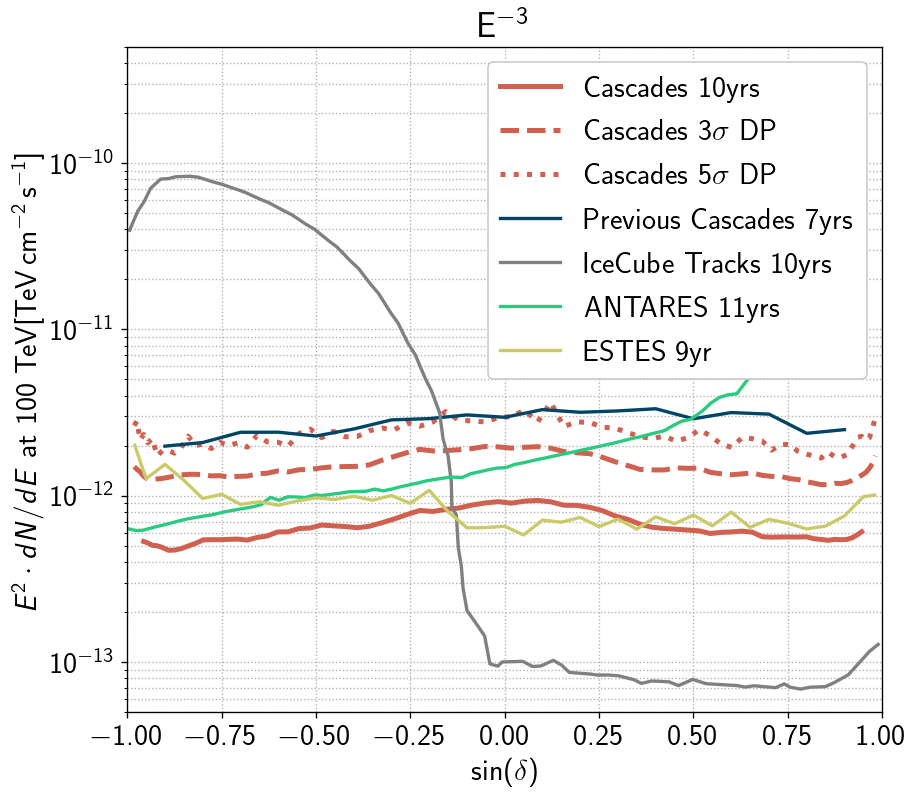

In [54]:
mpl.rc('font', size=18) 
fig, ax1 = plt.subplots (1, figsize=(8,7)) 

ax1.semilogy(sorted(np.sin(np.radians(E3_decs[8:-8]))), E3_fluxs[8:-8], 
             ls = '-', c=soft_colors[1], lw=3, label='Cascades 10yrs')
ax1.semilogy(sorted(np.sin(np.radians(E3_decs_dp3_nofit[1:]))), E3_fluxs_dp3_nofit[1:], 
             ls = '--', c=soft_colors[1], lw=3, label='Cascades 3$\sigma$ DP')
ax1.semilogy(sorted(np.sin(np.radians(E3_decs_dp5_nofit[1:]))), E3_fluxs_dp5_nofit[1:], 
             ls = ':', c=soft_colors[1], lw=3, label='Cascades 5$\sigma$ DP')

sd_m, phi_m = repo.get_performance('sens_E300_MESE')[:2]
ax1.semilogy (sd_m, phi_m,lw=2, c=soft_colors[0],  label=r'Previous Cascades 7yrs')

#ax1.semilogy(sorted(np.sin(np.radians(E3_sysdecs[4:-4]))), E3_sysfluxs[4:-4], 
#            ls = ':', c=soft_colors[1], lw=3, label='Systematics FullRange')
tracks = pd.read_pickle('/data/user/ssclafani/data/analyses/catalogs/10yr_sens_E300.pickle')
sd = tracks['sindec']
E2dNdE = tracks['E2dNdE']
ax1.semilogy (sd, E2dNdE, label=r'IceCube Tracks 10yrs', color='grey', ls='-')

#ax1.semilogy(tenyrsd, e2dnde, label='TEST 10yr', color=soft_colors[4], lw=2)

antares_sens = pd.read_pickle('/data/user/ssclafani/data/analyses/catalogs/antares_sens_E300.pickle')
sd = antares_sens['sindec']
e2dnde = antares_sens['E2dNdE']
ax1.semilogy(sd, e2dnde,  label=r'ANTARES 11yrs', color=soft_colors[2],lw=2,  ls='-')

ax1.semilogy(estes_sd, estes_E2dNdE, label='ESTES 9yr', color=soft_colors[4], lw=2)
if preliminary == True:
    ax1.text(-.9, .7e-13, r'\textbf{IceCube Preliminary}', c='r')
ax1.set_xlabel (r'$\sin(\delta)$')
ax1.set_ylabel (
    r'$E^2\cdot dN/dE$'
    r' at 100 TeV'
    r'[$\textsf{TeV}\,\textsf{cm}^{-2}\,\textsf{s}^{-1}]$')
ax1.set_xlim (-1, 1)
ax1.grid(which='both')
ax1.set_ylim (.5e-13, 5e-10)
ax1.legend (ncol=1)
ax1.set_title('E$^{-3}$')
plt.tight_layout()

cy.plotting.saving(plot_dir, 'ps_sens_E300_no_sources')

-> /home/ssclafani/public_html/DNNCASACDE/plots/ps_sens/ps_sens_E200_E300_combined


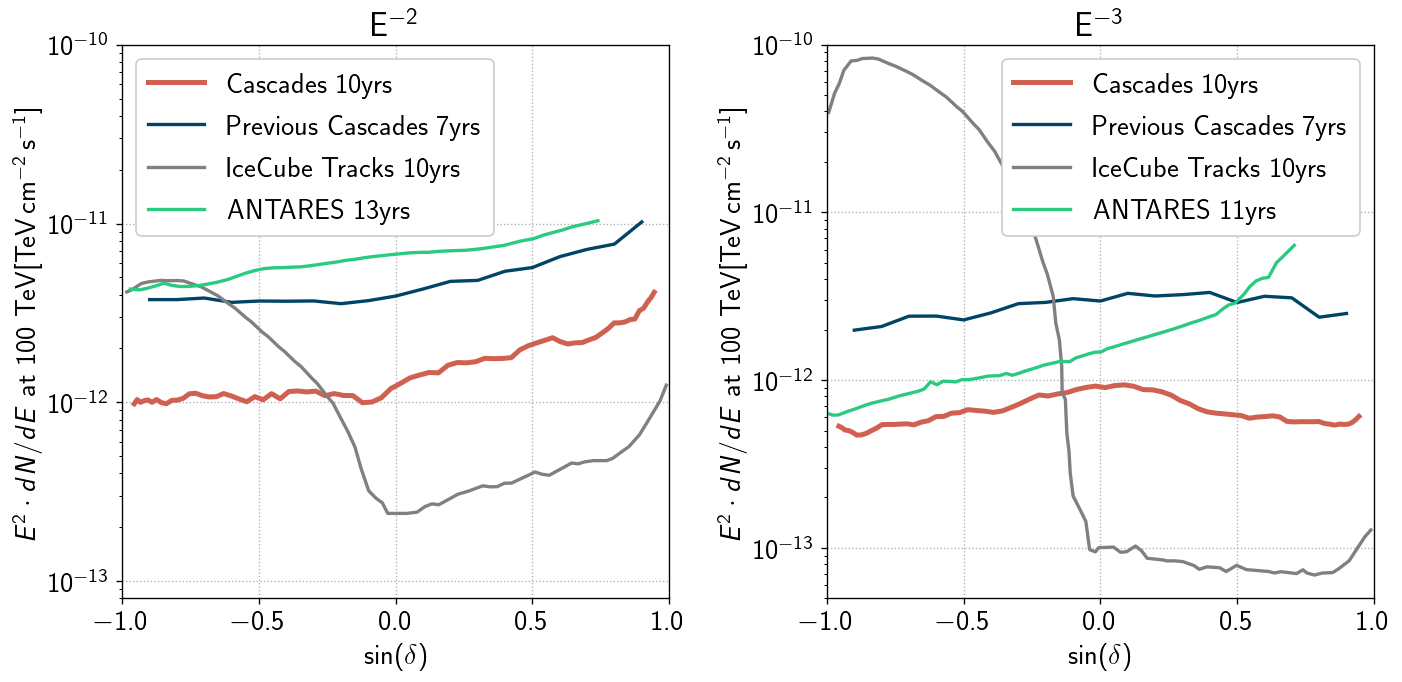

In [55]:
mpl.rc('font', size=17) 
fig, (ax1, ax2) = plt.subplots (1, 2, figsize=(12,6)) 
sd_m, phi_m = repo.get_performance('sens_E200_MESE')[:2]
ax1.semilogy(sorted(np.sin(np.radians(E2_decs[8:-8]))), E2_fluxs[8:-8], 
             ls = '-', c=soft_colors[1], lw=3, label='Cascades 10yrs')

ax1.semilogy (sd_m, phi_m,lw=2, c=soft_colors[0],  label=r'Previous Cascades 7yrs')


#ax1.semilogy(sorted(np.sin(np.radians(E2_sysdecs[4:-4]))), E2_sysfluxs[4:-4], 
#             ls = ':', c=soft_colors[1], lw=3, label='Systematics FullRange')
sd, phi = repo.get_performance ('sens_E200_ps10_current')[:2]
ax1.semilogy (sd_t, tracks_flux_E2, label=r'IceCube Tracks 10yrs', color='grey', ls='-')
#antares_sens = pd.read_pickle('/data/user/ssclafani/data/analyses/catalogs/antares_E2.pickle')
#sd_a = antares_sens['sindec']
#phi_a = antares_sens['flux']
ax1.semilogy (sd_a, phi_a /1e3, label=r'ANTARES 13yrs', color=soft_colors[2],lw=2,  ls='-')

#ax1.semilogy(estes_sd, estes_E2dNdE, label='ESTES-9yr', color=soft_colors[4], lw=2)

ax1.set_xlabel (r'$\sin(\delta)$')
ax1.set_ylabel (
    r'$E^2\cdot dN/dE$'
    r' at 100 TeV'
    r'[$\textsf{TeV}\,\textsf{cm}^{-2}\,\textsf{s}^{-1}]$')
ax1.set_xlim (-1, 1)
ax1.grid(which='major')
ax1.set_ylim (.8e-13, 1e-10)
ax1.legend (ncol=1)
ax1.set_title('E$^{-2}$')



ax2.semilogy(sorted(np.sin(np.radians(E3_decs[8:-8]))), E3_fluxs[8:-8], 
             ls = '-', c=soft_colors[1], lw=3, label='Cascades 10yrs')

sd_m, phi_m = repo.get_performance('sens_E300_MESE')[:2]
ax2.semilogy (sd_m, phi_m,lw=2, c=soft_colors[0],  label=r'Previous Cascades 7yrs')

#ax1.semilogy(sorted(np.sin(np.radians(E3_sysdecs[4:-4]))), E3_sysfluxs[4:-4], 
#            ls = ':', c=soft_colors[1], lw=3, label='Systematics FullRange')
tracks = pd.read_pickle('/data/user/ssclafani/data/analyses/catalogs/10yr_sens_E300.pickle')
sd = tracks['sindec']
E2dNdE = tracks['E2dNdE']
ax2.semilogy (sd, E2dNdE, label=r'IceCube Tracks 10yrs', color='grey', ls='-')


antares_sens = pd.read_pickle('/data/user/ssclafani/data/analyses/catalogs/antares_sens_E300.pickle')
sd = antares_sens['sindec']
e2dnde = antares_sens['E2dNdE']
ax2.semilogy(sd, e2dnde,  label=r'ANTARES 11yrs', color=soft_colors[2],lw=2,  ls='-')

#ax1.semilogy(estes_sd, estes_E2dNdE, label='ESTES 9yr', color=soft_colors[4], lw=2)
if preliminary == True:
    ax1.text(-.9, .7e-13, r'\textbf{IceCube Preliminary}', c='r')
ax2.set_xlabel (r'$\sin(\delta)$')
ax2.set_ylabel (
    r'$E^2\cdot dN/dE$'
    r' at 100 TeV'
    r'[$\textsf{TeV}\,\textsf{cm}^{-2}\,\textsf{s}^{-1}]$')
ax2.set_xlim (-1, 1)
ax2.grid(which='major')
ax2.set_ylim (.5e-13, 1e-10)
ax2.legend (ncol=1)
ax2.set_title('E$^{-3}$')

plt.tight_layout()

cy.plotting.saving(plot_dir, 'ps_sens_E200_E300_combined')

Reading /data/user/ssclafani/data/analyses/performance/sens_E250_MESE.tuple.npy ...


NameError: name 'fluxs_E300' is not defined

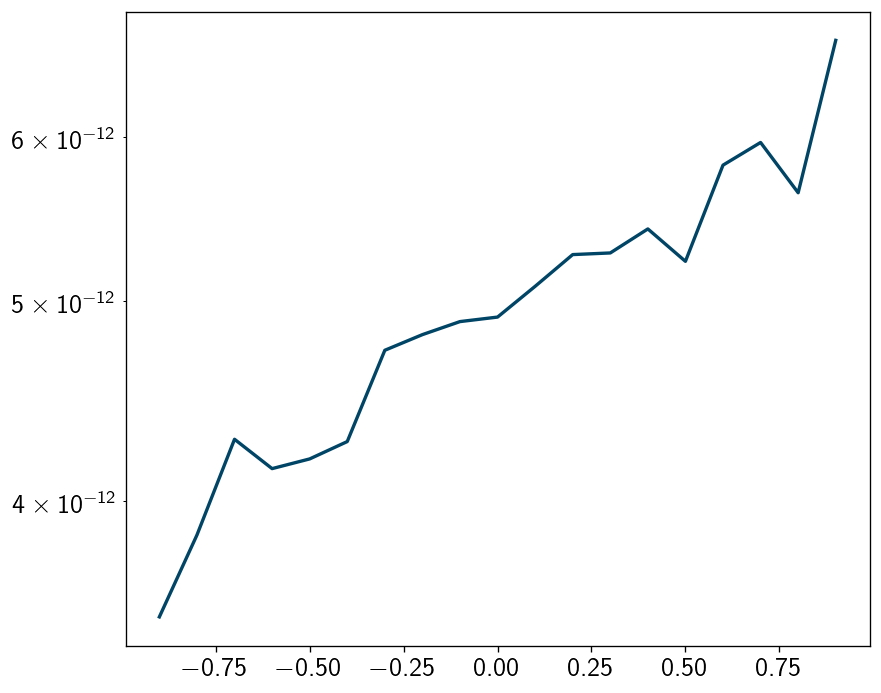

In [56]:
mpl.rc('font', size=16) 
fig, ax1 = plt.subplots (1, figsize=(8,7)) 

sd_m, phi_m = repo.get_performance('sens_E250_MESE')[:2]
ax1.semilogy (sd_m, phi_m,lw=2, c=soft_colors[0],  label=r'MESC-7yr')
ax1.semilogy(sorted(np.sin(np.radians(decs[4:-4]))), fluxs_E300[4:-4], 
             ls = '-', c=soft_colors[1], lw=3, label='DNNCascade-11yr')
#tracks = pd.read_pickle('/data/user/ssclafani/data/analyses/catalogs/10yr_sens_E300.pickle')
#sd = tracks['sindec']
#E2dNdE = tracks['E2dNdE']
#ax1.semilogy (sd, E2dNdE, label=r'PSTracks-10yr', color='grey', ls='-')


#antares_sens = pd.read_pickle('/data/user/ssclafani/data/analyses/catalogs/antares_sens_E300.pickle')
#sd = antares_sens['sindec']
#e2dnde = antares_sens['E2dNdE']
#ax1.semilogy(sd, e2dnde,  label=r'Antares-11yr', color=soft_colors[2],lw=2,  ls='-')

#ax1.semilogy(estes_sd, estes_E2dNdE, label='ESTES 9yr', color=soft_colors[4], lw=2)

ax1.set_xlabel (r'$\sin(\delta)$')
ax1.set_ylabel (
    r'$E^2\cdot dN/dE$'
    r' at 100 TeV'
    r'[${TeV}\,{cm}^{-2}\,{s}^{-1}]$')
ax1.set_xlim (-1, 1)
ax1.grid(which='both')
ax1.set_ylim (.8e-13, 1e-10)
ax1.legend (ncol=2)
ax1.set_title('E$^{-2.5}$')
plt.tight_layout()

cy.plotting.saving(plot_dir, 'ps_sens_E250_no_sources')

In [ ]:
MESC_cutoff_Flux = np.load('saved_sens/MESC_sens_100TeV_cutoff.npy')
sd = MESC_cutoff_Flux[::2]
MESC_flux_100TeVcutoff = MESC_cutoff_Flux[1::2]

In [ ]:
antares= [-0.9876522427310125, 9.441319436285771e-12,
-1.0072098793929252, 8.896278808190197e-12,
-0.953209071498644, 9.594230463244193e-12,
-0.9341947025217844, 9.678208301144843e-12,
-0.8931236655317676, 9.941795428126347e-12,
-0.8474891799873046, 1.0309435835186745e-11,
-0.8094604420335854, 1.033692516853843e-11,
-0.7592625079346761, 1.158816177891559e-11,
-0.7151491719083618, 1.1791910841934702e-11,
-0.6710358358820475, 1.1990531173438e-11,
-0.6269224998557332, 1.250537351247612e-11,
-0.5828091638294189, 1.3206472420641925e-11,
-0.537174678284956, 1.345820902024607e-11,
-0.491540192740493, 1.3665033529215598e-11,
-0.44590570719602995, 1.3986322924202649e-11,
-0.40179237116971556, 1.4469626964880728e-11,
-0.3576790351434014, 1.50836106153303e-11,
-0.31204454959893835, 1.5359969428238632e-11,
-0.2664100640544753, 1.5584697690205532e-11,
-0.22077557851001228, 1.5801234261780793e-11,
-0.17514109296554925, 1.610243119430851e-11,
-0.12950660742108622, 1.6266985284688367e-11,
-0.08387212187662318, 1.6385552480562725e-11,
-0.03823763633216015, 1.696681653391605e-11,
0.005875699694154246, 1.7572953992909763e-11,
0.04998903572046842, 1.8231613994880727e-11,
0.09562352126493145, 1.8837279731018468e-11,
0.13973685729124585, 1.9560683364357057e-11,
0.18537134283570889, 2.018931168705523e-11,
0.22948467886202306, 2.0898764340266142e-11,
0.27359801488833746, 2.1703085904383318e-11,
0.3207536499509491, 2.2197237943702194e-11,
0.36334583645911467, 2.3169018107926346e-11,
0.4089803220035777, 2.4236088245452966e-11,
0.451572508511743, 2.5611383720887138e-11,
0.49568584453805764, 2.718729874118477e-11,
0.5352357320099252, 2.932026023688193e-11,
0.5747856194817933, 3.16409809200577e-11,
0.6173778059899591, 3.449989457797988e-11,
0.6538853944255294, 3.820446862252359e-11,
0.687350683824802, 4.3050697908776633e-11]


In [ ]:
antares_13yr_E2 = [-0.9705539761813295, 4.297042434745883e-9,
-0.9372606991932391, 4.252735556481788e-9,
-0.911534076066078, 4.332565277457784e-9,
-0.8726919195799723, 4.50038584869661e-9,
-0.8469652964528112, 4.637060491209079e-9,
-0.8192208989627359, 4.508663744461057e-9,
-0.7869365091561025, 4.4389472954769175e-9,
-0.752298049259402, 4.450927601349018e-9,
-0.7187357356895894, 4.4989305126668546e-9,
-0.689074452554745, 4.579923989732101e-9,
-0.6551085841123494, 4.684797455814707e-9,
-0.6131052477910108, 4.866786295281784e-9,
-0.5798119708029201, 5.079063636984054e-9,
-0.5491754300593339, 5.274662136135451e-9,
-0.5152095616169379, 5.456868267991922e-9,
-0.48023480599308543, 5.598807531986031e-9,
-0.44694152900499473, 5.648412446876519e-9,
-0.41364825201690403, 5.6646284850263266e-9,
-0.3803549750288133, 5.698456856707154e-9,
-0.3470616980407226, 5.7211212625715375e-9,
-0.3137684210526319, 5.799879771225839e-9,
-0.2804751440645412, 5.903107842447166e-9,
-0.24839253169419928, 5.995731703569254e-9,
-0.2138885900883598, 6.09693063048084e-9,
-0.18227679173603129, 6.220593011783492e-9,
-0.14843703419131815, 6.30754092507519e-9,
-0.11552208989627388, 6.432700399488916e-9,
-0.080715482135997, 6.536227910900255e-9,
-0.04742220514790629, 6.6174458411501705e-9,
-0.016482998249883085, 6.7009863669220645e-9,
0.014840546622029382, 6.7684069080905084e-9,
0.05245762581636537, 6.8551008499581594e-9,
0.08688590088359582, 6.895658384714969e-9,
0.11947656001317108, 6.9010370505408805e-9,
0.1540189354164001, 6.977451996649152e-9,
0.18623606607760257, 7.023111571556144e-9,
0.2183186784479445, 7.053843908173724e-9,
0.25457135783497664, 7.083565105507699e-9,
0.28584686046015273, 7.152631309103302e-9,
0.318803841721091, 7.25003043354668e-9,
0.3520971187091817, 7.375814959540208e-9,
0.3949748239211166, 7.53861213482702e-9,
0.42608217868271625, 7.755005055992237e-9,
0.45681960814444844, 7.971161511792324e-9,
0.5049435266999613, 8.233189419480205e-9,
0.541263465232424, 8.618742437298401e-9,
0.5790967345370723, 8.939697641981619e-9,
0.6107085328894009, 9.204107977731011e-9,
0.6450779562043794, 9.577906725273999e-9,
0.6789765655013444, 9.84624827240291e-9,
0.7122698424894351, 1.0123670495312208e-8,
0.739509796388782, 1.0358532801175263e-8]


In [ ]:
antares_sd = antares_13yr_E2[::2]
antares_flux = antares_13yr_E2[1::2]

In [ ]:
np.save('/data/user/ssclafani/data/analyses/catalogs/antares_13yr_E2_sd.npy', antares_sd)
np.save('/data/user/ssclafani/data/analyses/catalogs/antares_13yr_E2_flux.npy', antares_flux)

In [ ]:
np.save('saved_sens/ANTARES_sens_100TeV_cutoff.npy', amtare)

In [ ]:
np.save('saved_sens/ANTARES_sens_100TeV_cutoff.npy', amtare)

In [ ]:
antares_sd = antares[::2]
antares_flux = antares[1::2]

In [ ]:
mpl.rc('font', size=16) 
fig, ax1 = plt.subplots (1, figsize=(8,7)) 

#sd_m, phi_m = repo.get_performance('sens_E200_100TeVCutoffMESE')[:2]
ax1.semilogy (sd, MESC_flux_100TeVcutoff,lw=3, c=soft_colors[0],  label=r'MESC-7yr E$_{cutoff}$=100TeV')
ax1.semilogy (antares_sd, antares_flux,lw=3, c=soft_colors[2],  label=r'Antares-9yr E$_{cutoff}$=100TeV')

ax1.semilogy(sorted(np.sin(np.radians(decs[4:-4]))), fluxs_E200_100TeVcutoff[4:-4], 
             ls = '-', c=soft_colors[1], lw=3, label='DNNCascade-11yr E$_{cutoff}$=100TeV')

ax1.semilogy(sorted(np.sin(np.radians(decs[4:-4]))), fluxs_E200_1PeVcutoff[4:-4], 
             ls = '-', c=soft_colors[3], lw=3, label='DNNCascade-11yr E$_{cutoff}$=1PeV')
ax1.semilogy(sorted(np.sin(np.radians(decs[4:-4]))), fluxs_E200[4:-4], 
             ls = '-', c=soft_colors[3], lw=3, alpha =.7,  label='DNNCascade-11yr No Cutoff')


ax1.set_xlabel (r'$\sin(\delta)$')
ax1.set_ylabel (
    r'$E^2\cdot dN/dE$'
    r' at 100 TeV'
    r'[${TeV}\,{cm}^{-2}\,{s}^{-1}]$')
ax1.set_xlim (-1, 1)
ax1.grid(which='both')
ax1.set_ylim (.8e-13, 1e-10)
ax1.legend (ncol=1)
ax1.set_title('E$^{-2} \cdot exp(-E/E_{cutoff})$')
plt.tight_layout()
cy.plotting.saving(plot_dir, 'ps_sens_E200_cutoff_no_sources')

In [ ]:
#Fermi Bubbles

In [ ]:
base_dir = '/data/user/ssclafani/data/analyses/baseline_all/gp/fermibubbles/2.0/cutoff/'

In [ ]:
cutoffs = [np.inf, 500, 100, 50]
for cutoff in cutoffs:
    s = np.load(base_dir + '{:.1f}_TeVsens.npy'.format(cutoff), allow_pickle  = True)
    s = s[()]
    
    print('Cutoff: {} TeV'.format(cutoff))
    print('nsig: {:.2f}'.format(s['n_sig']))
    print('Flux 1GeV: {}'.format(s['flux_1GeV']))
    print('Flux E^2 100TeV: {}'.format(s['fluxE2_100TeV']))
    print(' ')

In [ ]:
cutoffs = [np.inf, 500, 100, 50]
for cutoff in cutoffs:
    s = np.load(base_dir + '{:.1f}_TeVdp_5sigma.npy'.format(cutoff), allow_pickle  = True)
    s = s[()]
    
    print('Cutoff: {} TeV'.format(cutoff))
    print('nsig: {:.2f}'.format(s['n_sig']))
    print('Flux 1GeV: {}'.format(s['flux_1GeV']))
    print('Flux E^2 100TeV: {}'.format(s['fluxE2_100TeV']))
    print(' ')